In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
data = pd.read_csv("framingham.csv")

# # Description of Data

In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
male,4240.0,0.429245,0.495027,0.00,0.00,0.0,1.00,1.0
age,4240.0,49.580189,8.572942,32.00,42.00,49.0,56.00,70.0
education,4135.0,1.979444,1.019791,1.00,1.00,2.0,3.00,4.0
currentSmoker,4240.0,0.494104,0.500024,0.00,0.00,0.0,1.00,1.0
cigsPerDay,4211.0,9.005937,11.922462,0.00,0.00,0.0,20.00,70.0
BPMeds,4187.0,0.029615,0.169544,0.00,0.00,0.0,0.00,1.0
prevalentStroke,4240.0,0.005896,0.076569,0.00,0.00,0.0,0.00,1.0
prevalentHyp,4240.0,0.310613,0.462799,0.00,0.00,0.0,1.00,1.0
diabetes,4240.0,0.025708,0.158280,0.00,0.00,0.0,0.00,1.0
totChol,4190.0,236.699523,44.591284,107.00,206.00,234.0,263.00,696.0


In [4]:
corr=data.corr()["TenYearCHD"]
corr

male               0.088374
age                0.225408
education         -0.054248
currentSmoker      0.019448
cigsPerDay         0.057755
BPMeds             0.087519
prevalentStroke    0.061823
prevalentHyp       0.177458
diabetes           0.097344
totChol            0.082369
sysBP              0.216374
diaBP              0.145112
BMI                0.075300
heartRate          0.022907
glucose            0.125590
TenYearCHD         1.000000
Name: TenYearCHD, dtype: float64

In [5]:
"""male : A value of 1 indicates that the participant is male, and 0 indicates they are female. 
age: The age of the participant education: 1-High School, 2-High School Diploma/GED, 3-College, 4-Degree 
currentSmoker: 1- The participant is a current smoker, 0- participant does not smoke currently 
cigsPerDay: Number of cigarettes smoked per day 
BPMeds: Amount of BP medication the participant is on 
prevalentStroke: 0- no prevalence of stroke, 1-has had occurrences of stroke 
prevalentHyp: 0-no prevalence of hypertension, 1-prevalence of hypertension 
diabetes: 0-no diabetes, 1-has diabetes 
totChol: Total cholesterol 
sysBP: Systolic blood pressure 
diaBP: Diastolic blood pressure 
BMI: Body Mass Index 
Heart Rate: Heart rate in bpm 
Glucose: Glucose level (mg/dL)"""

'male : A value of 1 indicates that the participant is male, and 0 indicates they are female. \nage: The age of the participant education: 1-High School, 2-High School Diploma/GED, 3-College, 4-Degree \ncurrentSmoker: 1- The participant is a current smoker, 0- participant does not smoke currently \ncigsPerDay: Number of cigarettes smoked per day \nBPMeds: Amount of BP medication the participant is on \nprevalentStroke: 0- no prevalence of stroke, 1-has had occurrences of stroke \nprevalentHyp: 0-no prevalence of hypertension, 1-prevalence of hypertension \ndiabetes: 0-no diabetes, 1-has diabetes \ntotChol: Total cholesterol \nsysBP: Systolic blood pressure \ndiaBP: Diastolic blood pressure \nBMI: Body Mass Index \nHeart Rate: Heart rate in bpm \nGlucose: Glucose level (mg/dL)'

In [6]:
data=data.dropna()

In [7]:
data.groupby(["diabetes"])["TenYearCHD"].value_counts()

diabetes  TenYearCHD
0         0             3037
          1              522
1         0               64
          1               35
Name: TenYearCHD, dtype: int64

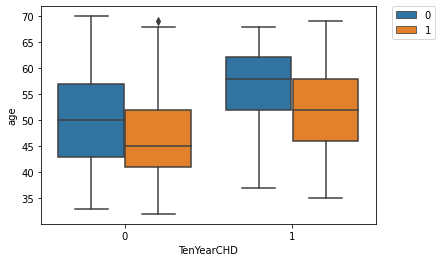

In [8]:
sns.boxplot(x='TenYearCHD',y='age',hue='currentSmoker',data=data)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

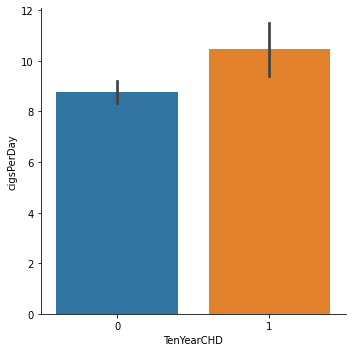

In [9]:
sns.catplot(x='TenYearCHD',y='cigsPerDay',kind='bar',data=data)

In [10]:
lowBlood = data[ (data["sysBP"]<=90) | (data["diaBP"]<=60) ]
normalBlood = data[ (data["sysBP"]>90) & (data["diaBP"]>60) & (data["diaBP"]<=80) & (data["sysBP"]<=120)]
elevatedBlood = data[ (data["sysBP"]>120) & (data["diaBP"]>60) & (data["diaBP"]<=80) & (data["sysBP"]<=129)]
highBlood = data[ (data["sysBP"]>=130) | (data["diaBP"]>=80) ]

meanBloodDf= pd.DataFrame(data = [lowBlood.describe().loc["mean"],normalBlood.describe().loc["mean"],
                                elevatedBlood.describe().loc["mean"],highBlood.describe().loc["mean"]], columns= data.columns, 
                        index = ["low","normal","elev","high"] )

In [11]:
meanBloodDf

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
low,0.237288,46.033898,1.966102,0.593220,9.677966,0.016949,0.000000,0.067797,0.050847,211.728814,105.322034,58.432203,22.987288,73.762712,83.423729,0.169492
normal,0.420619,46.108247,2.145361,0.579381,10.185567,0.001031,0.002062,0.008247,0.013402,224.974227,110.981443,72.075258,24.158443,73.004124,78.961856,0.082474
elev,0.430168,49.245810,1.994413,0.519553,9.547486,0.002793,0.002793,0.033520,0.013966,232.170391,124.541899,75.303073,24.525754,74.005587,80.949721,0.142458
high,0.465617,50.938277,1.917978,0.444905,8.446562,0.045153,0.007457,0.467274,0.033969,242.531069,142.073529,88.786868,26.677229,77.023612,83.037283,0.178956


<AxesSubplot:ylabel='prevalentStroke'>

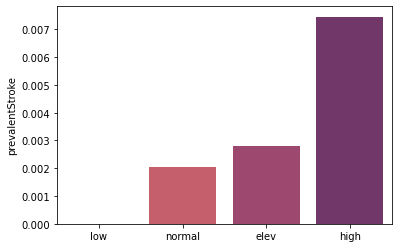

In [12]:
sns.barplot(data = meanBloodDf, y="prevalentStroke", x=["low","normal","elev","high"],palette="flare")

<AxesSubplot:ylabel='prevalentHyp'>

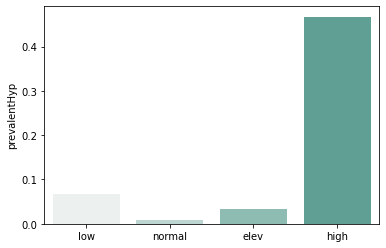

In [13]:
sns.barplot(data = meanBloodDf, y="prevalentHyp", x=["low","normal","elev","high"],palette="light:#5A9")

<AxesSubplot:ylabel='totChol'>

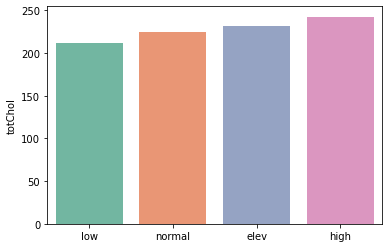

In [14]:
sns.barplot(data = meanBloodDf, y="totChol", x=["low","normal","elev","high"],palette="Set2")

<AxesSubplot:ylabel='glucose'>

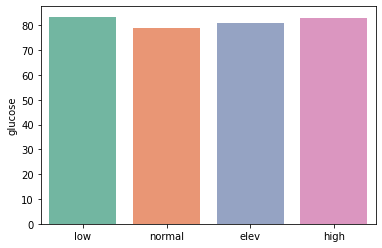

In [15]:
sns.barplot(data = meanBloodDf, y="glucose", x=["low","normal","elev","high"],palette="Set2")

<AxesSubplot:ylabel='TenYearCHD'>

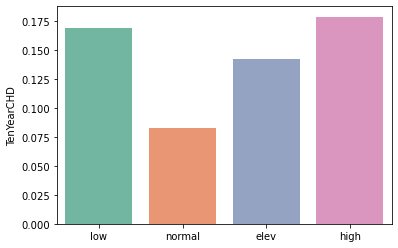

In [16]:
sns.barplot(data = meanBloodDf, y="TenYearCHD", x=["low","normal","elev","high"],palette="Set2")

In [17]:
adults = data[data["age"]<65]
elders = data[data["age"]>=65]
ageData = pd.DataFrame(data= [adults.describe().loc["mean"],elders.describe().loc["mean"] ],index=["adults","elders"])
ageData

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
adults,0.444287,48.885162,1.990904,0.497157,9.235361,0.026720,0.005401,0.300739,0.025583,236.428937,131.770466,82.825753,25.747055,75.693576,81.617396,0.143547
elders,0.428571,66.307143,1.714286,0.285714,3.750000,0.121429,0.014286,0.585714,0.064286,247.371429,147.450000,85.210714,26.681071,76.664286,87.771429,0.371429


<AxesSubplot:ylabel='prevalentStroke'>

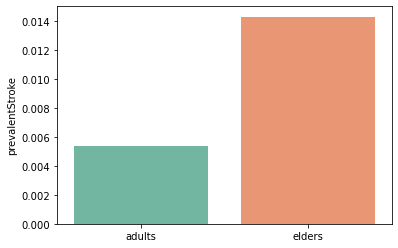

In [18]:
sns.barplot(data =ageData, y="prevalentStroke", x=["adults","elders"],palette="Set2")

<AxesSubplot:ylabel='TenYearCHD'>

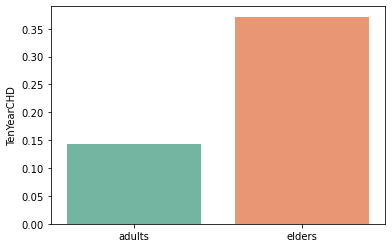

In [19]:
sns.barplot(data =ageData, y="TenYearCHD", x=["adults","elders"],palette="Set2")

In [20]:
diabetes = data[data["diabetes"]==1 ]
noDiabetes =  data[data["diabetes"] ==0]
diabetesData = pd.DataFrame(data = [noDiabetes.describe().loc["mean"],diabetes.describe().loc["mean"] ],
                            index = ["noDiabetes","diabetes"] )
diabetesData

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
noDiabetes,0.442540,49.396179,1.987075,0.492554,9.098904,0.028941,0.005620,0.305423,0.0,236.491430,131.992835,82.815819,25.722456,75.608879,79.402079,0.146670
diabetes,0.484848,55.151515,1.737374,0.363636,6.383838,0.080808,0.010101,0.535354,1.0,249.656566,145.949495,86.555556,27.952222,80.111111,169.959596,0.353535


In [21]:
adults.groupby(["diabetes"])["TenYearCHD"].value_counts()

diabetes  TenYearCHD
0         0             2953
          1              475
1         0               60
          1               30
Name: TenYearCHD, dtype: int64

In [22]:
elders.groupby(["diabetes"])["TenYearCHD"].value_counts()

diabetes  TenYearCHD
0         0             84
          1             47
1         1              5
          0              4
Name: TenYearCHD, dtype: int64

<AxesSubplot:xlabel='diabetes', ylabel='count'>

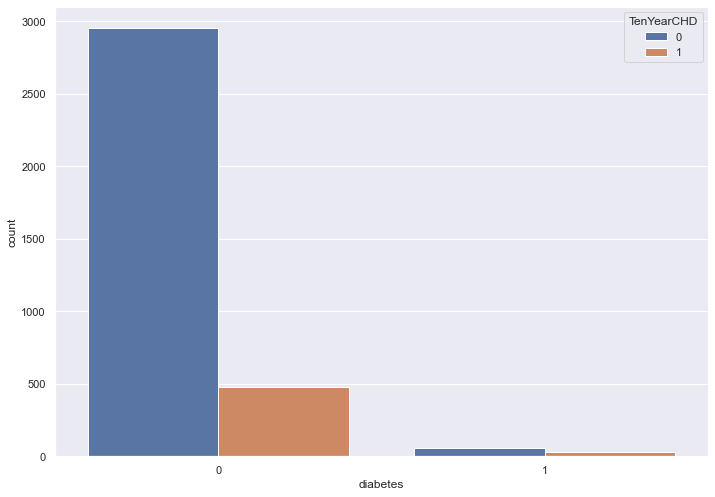

In [23]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(data=adults,x="diabetes",hue="TenYearCHD")

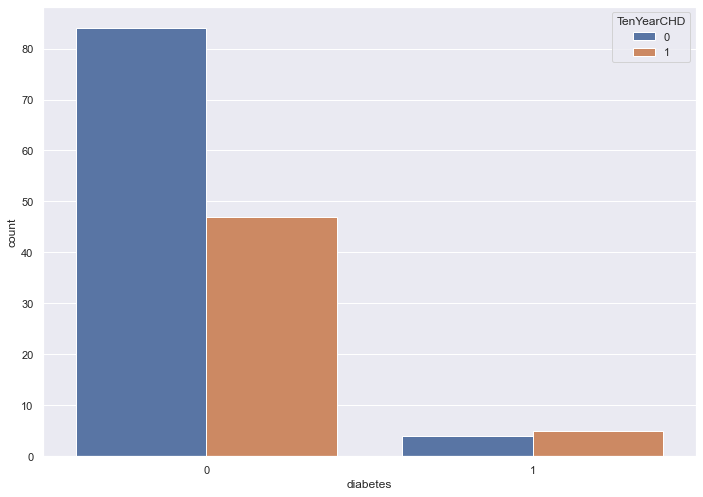

In [24]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
k=sns.countplot(data=elders,x="diabetes",hue="TenYearCHD")


# Training Data


In [25]:
X= data.drop("TenYearCHD",axis=1)
Y= data["TenYearCHD"]
x_train , x_test, y_train, y_test = train_test_split(X,Y,test_size=0.35,random_state=50)

In [26]:
models = {"log_regress" : LogisticRegression() ,"SVC":SVC(), "GBC": GradientBoostingClassifier()}

In [27]:
def fit_score(models,x_train,x_test,y_train,y_test):
    model_scores = {}
    for name, model in models.items():
        model.fit(x_train,y_train)
        scores = cross_val_score(model, x_train, y_train, cv=5)
        model_scores[name] = model.score(x_test,y_test)
    return model_scores

model_scores = fit_score(models,x_train,x_test,y_train,y_test)
model_scores

C:\Users\mxjas\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mxjas\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

{'log_regress': 0.8423106947697112,
 'SVC': 0.8462138953942233,
 'GBC': 0.8446526151444185}

In [28]:
def fit_score(models,x_train,x_test,y_train,y_test):
    model_scores = {}
    for name, model in models.items():
        model.fit(x_train,y_train)
        scores = cross_val_score(model, x_train, y_train, cv=5)
        model_scores[name] = model.score(x_train,y_train)
    return model_scores

model_scores = fit_score(models,x_train,x_test,y_train,y_test)
model_scores

C:\Users\mxjas\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mxjas\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

{'log_regress': 0.8535969709718132,
 'SVC': 0.8498106857383256,
 'GBC': 0.8906184265881363}

In [29]:
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=1 - train_ratio)

x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio))

In [30]:
def fit_score(models,x_train,x_val,x_test,y_train,y_val,y_test):
    model_scores = {}
    for name, model in models.items():
        model.fit(x_train,y_train)
        scores = cross_val_score(model, x_val, y_val, cv=5)
        model_scores[name] = model.score(x_test,y_test)
    return model_scores


model_scores = fit_score(models,x_train,x_val,x_test,y_train,y_val,y_test)
model_scores

C:\Users\mxjas\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mxjas\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

{'log_regress': 0.8770491803278688,
 'SVC': 0.8825136612021858,
 'GBC': 0.8770491803278688}